### Μέλη Ομάδας:
Ον/μο1:  
Αρ. Μητρώου 1:  Καπαρού Αλεξάνδρα, 03117100

Ον/μο2:  
Αρ. Μητρώου 2: Πούτας Σωκράτης, 03117054

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$





---

Αρχικά υλοποιήσαμε την μετρική της ορθότητας υπολογίζοντας το σύνολο των σωστών προβλέψεων (συγκρίνοντας κάθε φορά αν αυτό που προβλέφθηκε ανήκει στο σύνολο αυτών που όντως θα έπρεπε να προβλεφθούν) προς το σύνολο όλων των δεδομένων με βάση τον τύπο που μας δίνεται παραπάνω. Επίσης, τροποποιήσαμε την συνάρτηση `get_evaluation_report` ώστε να επιστρέφει το accuracy κάθε ταξινόμησης για πιο εύκολη σύγκριση σε μεταγενέστερο στάδιο.

In [1]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred

      ##################
      ## Your code below
      acc = 1
      correct_preds = 0
      for i in range(len(y_true)):
        # find correct predictions
        if y_pred[i] == y_true[i]:
          correct_preds += 1
      acc = correct_preds/len(y_true)
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)
        return(metrics['accuracy'])

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [2]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval = eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [3]:
import pandas as pd
from tqdm.notebook import tqdm 
# read data in the form of pandas DataFrame
data = pd.read_csv("music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


Βλέπουμε λοιπόν ότι το dataset μας αποτελείται από μία πληθώρα χαρακτηριστικών για κάθε τραγούδι μερκά από τα οποία θεωρούνται σημαντικά για τον διαχωρισμό του είδους στο οποίο ανήκει το κάθε ένα.

## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.



---

Χρησιμοποιήσαμε την συνάρτηση `train_tset_split` του πακέτου sklearn για να διαχωρίσουμε τυχαία το dataset μας σε train και test set με ποσοστό 70% - 30% αντίστοιχα. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]
outputs = data["music_genre"]
# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
# x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below
x_train, x_test, y_train, y_test = train_test_split(data[inputs], data[output], train_size=0.7, test_size=0.3)
## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.



---


Στην συνέχεια, τυπώσαμε τα μεγέθη του κάθε set για να βεβαιωθούμε ότι ο διαχωρισμός έγινε σωστά.

In [7]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print("The shape of x_train is :", x_train.shape)
print("The shape of y_train is :", y_train.shape)
print("The shape of x_test is :", x_test.shape)
print("The shape of y_test is :", y_test.shape)
print("The percentage of train set is ",np.round(x_train.shape[0]/data.shape[0],2)*100,"% of the dataset")
print("The percentage of test set is ",np.round(x_test.shape[0]/data.shape[0],2)*100,"% of the dataset")
## Your code above
##################

The shape of x_train is : (9471, 6)
The shape of y_train is : (9471,)
The shape of x_test is : (4060, 6)
The shape of y_test is : (4060,)
The percentage of train set is  70.0 % of the dataset
The percentage of test set is  30.0 % of the dataset


Παρατηρούμε ότι όπως περιμέναμε τα train sets έχουν ίδιο αριθμό γραμμών με τα αντίστοιχα test sets και ότι το test set αντιστοιχεί στο 30% ενώ το train test στο 70% του dataset, όπως ακριβώς μας ζητήθηκε.

Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 



---

Για να βρούμε την μέγιστη και την ελάχιστη τιμή χρησιμοποιούμε την built-in συνάρτηση `describe` και τυπώνουμε μόνο την ελάχιστη και την μέγιστη τιμή.

In [8]:
# Range of x_train, x_test columns

##################
## Your code below
print("For x_train :")
x_train.describe().loc[['min','max']]

For x_train :


,acousticness,danceability,energy,instrumentalness,liveness,speechiness
min,0.000003,0.0789,0.00259,0.00,0.0194,0.0224
max,0.994000,0.9750,0.99900,0.98,0.9910,0.9220


In [9]:
print("\nFor x_test :")
x_test.describe().loc[['min','max']]
## Your code above
##################


For x_test :


,acousticness,danceability,energy,instrumentalness,liveness,speechiness
min,0.000001,0.0645,0.0264,0.000,0.0173,0.0226
max,0.993000,0.9770,0.9980,0.986,0.9890,0.8630


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 



---
Με βάση τα παραπάνω, βλέπουμε ότι τα χαρακτηριστικά και στις δύο περιπτώσεις έχουν μεγάλη διαφορά μεταξύ ελάχιστης και μέγιστης τιμής μιας και σε μερικές περιπτώσεις παίρνουν τιμές από 0 έως 0.99. Παρ΄όλα αυτά μπορούμε να θεωρήσουμε ότι έχουν παρόμοιο εύρος (με συνήθη διαφορά δεύτερου δεκαδικού ψηφίου). Παρατηρούμε επίσης ότι όλα τα χαρακτηριστικά βρίσκονται στο εύρος [0,1] οπότε δεν χρειάζονται κάποιου είδους κανονικοποίηση όπως γίνεται συνήθως σε τέτοιες εφαρμογές. Η κανονικοποίηση των χαρακτηριστικών γενικά χρησιμοποιείται επειδή χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση.

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$



---

Υλοποιήσαμε τον αλγόριθμο KNN με βάση τα βήματα που μας δώθηκαν. Παρατηρήσαμε ότι κατά το τρέξιμο του αλγορίθμου τα αποτελέσματα για την συνάρτηση euclidean δεν έβγαιναν πάντα ίδια με αυτά της έτοιμης συνάρτησης. Ο λόγος για τον οποίο συνέβαινε αυτό ήταν επειδή όταν υπήρχε ισοβαθμία σε δύο κλάσεις (παραδείγματος χάρη όταν στους 5 κοντινότερους γείτονες υπάρχαν 2 rock και 2 rap) ο έτοιμος ΚΝΝ διάλεγε την κλάση που προηγείται λεξικογραφικά, δηλαδή την rap. Επομένως το λάβαμε υπόψιν για την υλοποίηση του δικού μας ΚΝΝ.

In [10]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      dist = 0
      if self.distance=='euclidian':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1-row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - (np.dot(row1, row2)/(np.linalg.norm(row1) * np.linalg.norm(row2)))
        ## Your code above
        ##################
        pass
      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop

      #for each xi in x vector we calculate the distance with the row
      for i in x:
        distance = self.get_distance(i, row)
        distances.append(distance)
        
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]

      ##################
      ## Your code below
      counts = {"Electronic": 0, "Rap": 0, "Rock": 0}
      for item in nn_labels:
          counts[item] += 1
            
      max = 0
      for label in ["Electronic", "Rap", "Rock"]:
        if(counts[label] > max):
          max = counts[label]
          prediction = label
      ## Your code above
      ###################
      return prediction

In [11]:
y_test_mlp = y_test
y_train_mlp = y_train
x_test_mlp = x_test
x_train_mlp = x_train

Προκειμένου να μην σκάει το πρόγραμμα στις συναρτήσεις υπολογισμού απόστασης, καθώς τα train και test sets είναι pandas dataframes, μετατρέπουμε το κάθε set σε numpy array.

In [12]:
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

Τυπώνουμε τα αποτελέσματα ενός τυχαίου παραδείγματος με `k = 5`:

In [13]:
knn_e = KNN(x_train, y_train, k=5, distance='euclidian')
knn_c = KNN(x_train, y_train, k=5, distance='cosine')

In [14]:
preds_e = [knn_e.classify(x_test[i]) for i in range(100)]
labels_e = [y_test[i] for i in range(100)]

In [15]:
preds_c = [knn_c.classify(x_test[i]) for i in range(100)]
labels_c = [y_test[i] for i in range(100)]

* Απόσταση euclidean 

In [16]:
eval = Evaluate(labels_e, preds_e)
eval = eval.get_evaluation_report()

precision: 0.6841853798375537
recall: 0.6931541069410575
f1: 0.6856373575164026
accuracy: 0.69
Confusion matrix: 
[[33  3  7]
 [ 2 18  3]
 [11  5 18]]


* Απόσταση cosine

In [17]:
eval = Evaluate(labels_c, preds_c)
eval = eval.get_evaluation_report()

precision: 0.6660267991568805
recall: 0.6760245048474395
f1: 0.6693217893217893
accuracy: 0.68
Confusion matrix: 
[[32  3  8]
 [ 3 16  4]
 [ 6  8 20]]


Σε αυτό το τυχαίο παράδειγμα παρατηροούμε ότι η ταξινόμηση με χρήση της ευκλίδειας απόστασης παράγει καλύτερα αποτελέσματα μιας και έχουν μεγαλύτερο accuracy.

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval = eval.get_evaluation_report()

precision: 0.6841853798375537
recall: 0.6931541069410575
f1: 0.6856373575164026
accuracy: 0.69
Confusion matrix: 
[[33  3  7]
 [ 2 18  3]
 [11  5 18]]


Με βάση τα παραπάνω, βλέπουμε ότι και η δική μας υλοποίηση με χρήση της ευκλίδειας απόστασης αλλά και η έτοιμη βγάζουν τα ίδια αποτελέσματα, κάτι το οποίο μας πιστοποιεί πως η υλοποίηση μας έγινε ορθά.

## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.



---

Σε αυτό το σημείο μας ζητήθηκε να κάνουμε συγκρίσεις μεταξύ των δύο υλοποιήσεων που αφορούν την ποιότητα των αποτελεσμάτων (δηλαδή τις μετρικές precision, recall, f1-score και accuracy) κα τους χρόνους εκτέλεσης.

### Συγκρίσεις που αφορούν την ποιότητα

In [19]:
evaluations = {}

#### k = 5

In [20]:
k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)
evaluations['k = 5, KNC'] = eval.get_evaluation_report()

precision: 0.6841853798375537
recall: 0.6931541069410575
f1: 0.6856373575164026
accuracy: 0.69
Confusion matrix: 
[[33  3  7]
 [ 2 18  3]
 [11  5 18]]


In [21]:
knn = KNN(x_train, y_train, k = 5, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 5, euclidean'] = eval.get_evaluation_report()

precision: 0.6841853798375537
recall: 0.6931541069410575
f1: 0.6856373575164026
accuracy: 0.69
Confusion matrix: 
[[33  3  7]
 [ 2 18  3]
 [11  5 18]]


In [22]:
knn = KNN(x_train, y_train, k = 5, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 5, cosine'] = eval.get_evaluation_report()

precision: 0.6660267991568805
recall: 0.6760245048474395
f1: 0.6693217893217893
accuracy: 0.68
Confusion matrix: 
[[32  3  8]
 [ 3 16  4]
 [ 6  8 20]]


#### k = 10

##### Λαμβάνοντας υπόψιν 100 τυχαία δείγματα

In [23]:
k = 10
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)
evaluations['k = 10, KNC'] = eval.get_evaluation_report()

precision: 0.6785714285714285
recall: 0.6905172584706278
f1: 0.6815359477124182
accuracy: 0.69
Confusion matrix: 
[[32  5  6]
 [ 2 17  4]
 [ 8  6 20]]


In [24]:
knn = KNN(x_train, y_train, k = 10, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 10, euclidean'] = eval.get_evaluation_report()

precision: 0.6785714285714285
recall: 0.6905172584706278
f1: 0.6815359477124182
accuracy: 0.69
Confusion matrix: 
[[32  5  6]
 [ 2 17  4]
 [ 8  6 20]]


In [25]:
knn = KNN(x_train, y_train, k = 10, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 10, cosine'] = eval.get_evaluation_report()

precision: 0.7042224571294339
recall: 0.7064473918991258
f1: 0.7051875703127116
accuracy: 0.72
Confusion matrix: 
[[34  4  5]
 [ 3 15  5]
 [ 6  5 23]]


##### Λαμβάνοντας υπόψιν 50 τυχαία δείγματα

In [26]:
k = 10
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:50])
eval = Evaluate(y_test[:50], y_pred)
evaluations['k = 10, KNC, 50 samples'] = eval.get_evaluation_report()

precision: 0.6932632584806497
recall: 0.6960784313725491
f1: 0.6874074074074074
accuracy: 0.7
Confusion matrix: 
[[17  3  2]
 [ 2  8  1]
 [ 4  3 10]]


In [27]:
knn = KNN(x_train, y_train, k = 10, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(50)]
labels = [y_test[i] for i in range(50)]
eval = Evaluate(labels, preds)
evaluations['k = 10, euclidean, 50 samples'] = eval.get_evaluation_report()

precision: 0.6932632584806497
recall: 0.6960784313725491
f1: 0.6874074074074074
accuracy: 0.7
Confusion matrix: 
[[17  3  2]
 [ 2  8  1]
 [ 4  3 10]]


In [28]:
knn = KNN(x_train, y_train, k = 10, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(50)]
labels = [y_test[i] for i in range(50)]
eval = Evaluate(labels, preds)
evaluations['k = 10, cosine, 50 samples'] = eval.get_evaluation_report()

precision: 0.7619047619047619
recall: 0.7611408199643493
f1: 0.7582982702197287
accuracy: 0.78
Confusion matrix: 
[[20  1  1]
 [ 1  8  2]
 [ 3  3 11]]


#### k = 50

In [29]:
k = 50
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)
evaluations['k = 50, KNC'] = eval.get_evaluation_report()

precision: 0.7286735356910796
recall: 0.7395368663137653
f1: 0.7315870459831814
accuracy: 0.74
Confusion matrix: 
[[32  6  5]
 [ 1 17  5]
 [ 5  4 25]]


In [30]:
knn = KNN(x_train, y_train, k = 50, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 50, euclidean'] = eval.get_evaluation_report()

precision: 0.7286735356910796
recall: 0.7395368663137653
f1: 0.7315870459831814
accuracy: 0.74
Confusion matrix: 
[[32  6  5]
 [ 1 17  5]
 [ 5  4 25]]


In [31]:
knn = KNN(x_train, y_train, k = 50, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
evaluations['k = 50, cosine'] = eval.get_evaluation_report()

precision: 0.7046783625730995
recall: 0.7095402367215845
f1: 0.7053454163383241
accuracy: 0.71
Confusion matrix: 
[[30  6  7]
 [ 1 16  6]
 [ 7  2 25]]


### Συγκρίσεις που αφορούν τους χρόνους

Προκειμένου να μπορέσουμε να βάλουμε τους χρόνους σε έναν πίνακα, δεν χρησιμοποιούμε την συνάρτηση `%%time` που μας δίνεται από την εκφώνηση αλλά την `time.time()`.

In [32]:
times = {}

#### k = 5

In [33]:
import time
start_time = time.time()
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
times['k = 5, KNC'] = np.round(time.time() - start_time,4)

In [34]:
start_time = time.time()
knn = KNN(x_train, y_train, k=5, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 5, euclidean'] = np.round(time.time() - start_time,4)

In [35]:
start_time = time.time()
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 5, cosine'] = np.round(time.time() - start_time,4)

#### k = 10

##### Λαμβάνοντας υπόψιν 100 τυχαία δείγματα

In [36]:
start_time = time.time()
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
times['k = 10, KNC'] = np.round(time.time() - start_time,4)

In [37]:
start_time = time.time()
knn = KNN(x_train, y_train, k=10, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 10, euclidean'] = np.round(time.time() - start_time,4)

In [38]:
start_time = time.time()
knn = KNN(x_train, y_train, k = 10, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 10, cosine'] = np.round(time.time() - start_time,4)

##### Λαμβάνοντας υπόψιν 50 τυχαία δείγματα

In [39]:
start_time = time.time()
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:50])
times['k = 10, KNC, 50 samples'] = np.round(time.time() - start_time,4)

In [47]:
start_time = time.time()
knn = KNN(x_train, y_train, k=10, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 10, euclidean, 50 samples'] = np.round(time.time() - start_time,4)

In [41]:
start_time = time.time()
knn = KNN(x_train, y_train, k = 10, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 10, cosine, 50 samples'] = np.round(time.time() - start_time,4)

####k = 50

In [42]:
start_time = time.time()
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
times['k = 50, KNC'] = np.round(time.time() - start_time,4)

In [43]:
start_time = time.time()
knn = KNN(x_train, y_train, k = 50, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 50, euclidean'] = np.round(time.time() - start_time,4)

In [44]:
start_time = time.time()
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
times['k = 50, cosine'] = np.round(time.time() - start_time,4)

## Σχολιασμός
<εδώ γράφετε τυχόν σχόλια και παρατηρήσεις που έχετε στο δευτερο μέρος: παραδοχές, επίδοση, χρόνος εκτέλεσης, επίδραση παραμέτρου k κλπ >

In [45]:
from IPython.display import HTML, display


def print_dict_as_html_table(some_dict, dict2):
    
        # create a list that will hold the html content  
        # initialise with the <table> tag
        html_list = ["<table>"]
        html_list.append("<tr>")
        html_list.append("<th>Ταξινομητές </th>")
        html_list.append("<th>Ορθότητα (%)</th>")
        html_list.append("<th>Χρόνοι εκτέλεσης</th>")
        html_list.append("</tr>")
        #iterate through the dictionary, appending row and element tags to the list
        for key in some_dict.keys():
            html_list.append("<tr>")
            html_list.append("<td>{0}</td>".format(key))
            html_list.append("<td>{0}</td>".format(100 * some_dict[key]))
            html_list.append("<td>{0}</td>".format(dict2[key]))
            html_list.append("</tr>")
            
        # add the final </table> tag to the list
        html_list.append("</table>")
        
        # create a string from the list
        html_string = ' '.join([str(elem) for elem in html_list])

        #display the html 
        display(HTML(html_string))

In [48]:
print_dict_as_html_table(dict(evaluations.items()),dict(times.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
"k = 5, KNC",69.0,0.0273
"k = 5, euclidean",69.0,7.9531
"k = 5, cosine",68.0,14.1229
"k = 10, KNC",69.0,0.0302
"k = 10, euclidean",69.0,8.0482
"k = 10, cosine",72.0,14.3336
"k = 10, KNC, 50 samples",70.0,0.0241
"k = 10, euclidean, 50 samples",70.0,7.8137
"k = 10, cosine, 50 samples",78.0,14.0155
"k = 50, KNC",74.0,0.0355


Με βάση τον παραπάνω πίνακα έχουμε τα κάτωθι αποτελέσματα:


*  Όσον αφορά την ποιότητα:

Με βάση τα παραπάνω παρατηρούμε ότι αύξηση του k επηρεάζει την διακύμανση και την απόκλιση των αποτελεσμάτων. Έαν θέσουμε μικρό k, πχ k=2 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή απόκληση δηλαδή ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Αντίθετα, αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση δηλαδή θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.

Βέβαια, αύξηση του αριθμού των γειτόνων αυξάνει και την ποιότητα των αποτελεσμάτων, μιας και στην δική μας περίπτωση για σταθερό αριθμό δειγμάτων ίσο με 100, αυξάνεται συνεχώς το accuracy για την έτοιμη και την δική μας υλοποίηση με euclidean ενώ για την υλοποίηση με cosine φτάνει σε ένα τοπικό μέγιστο για k = 10 και μετά μειώνεται για k = 50.

Επιπλέον, είδαμε ότι η αλλαγη της ποσότητας των δειγμάτων (από 100 σε 50) επηρεάζει το αποτελέσμα του accuracy αυξάνοντας το. Φυσικά αυτό το συμπέρασμα δεν μπορεί να γενικευτεί για κάθε περίπτωση μιας και παίζουν σημαντικό ρόλο τα train και test sets που παράγονται τυχαία.

Ακόμα, βλέπουμε ότι η υλοποίηση μας με ευκλείδια απόσταση παράγει τα ίδια αποτελέσματα με την έτοιμη υλοποίηση ενώ η σύγκριση τους με την απόσταση συνημιτόνου δεν είναι εφικτή μιας και σε μερικές περιπτώσεις έχουν μεγαλύτερο accuracy και σε μερικές μικρότερο. 

*  Όσον αφορά τους χρόνους εκτέλεσης:

Μετρώντας τους χρόνους κάθε υλοποίησης βλέπουμε ότι με την αύξηση του k έχουμε και αύξηση του υπολογιστικού κόστους, μιας και λαμβάνουμε υπόψιν μεγαλύτερο αριθμό γειτόνων, και άρα και του χρόνου εκτέλεσης.

Επίσης παρατηρούμε ότι σε κάθε περίπτωση η έτοιμη υλοποίηση δίνει πολύ καλύτερους χρόνους από την δική μας. Κάτι τέτοιο είναι αναμενόμενο μιας και οι έτοιμες συναρτήσεις  στην γενική περίπτωση είναι βελτιστοποιημένες και χρησιμοποιούν ταχύτερες δομές δεδομένων από την δική μας. Όσον αφορά την δική μας υλοποίηση, παρατηρούμε ότι είναι ταχύτερος ο υπολογισμός με χρήση της ευκλείδιας απόστασης αντί της απόστασης συνημιτόνου.

Τέλος, παρατηρούμε ότι όπως είναι αναμενόμενο, όταν εξετάζουμε λιγότερα δείγματα (πχ 50 αντί 100) μειώνεται αντίστοιχα ο χρόνος εκτέλεσης.

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [49]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.



---

Υπολογίσαμε τις πιθανότητες $p(x^{(k)}|i)$ και $p(i|x)$ όπως μας ζητήθηκαν και υλοποιήσαμε τον αλγόριθμο Naive Bayes:

In [50]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: 
          if label == 'Electronic':
            self.pC[0] += 1
          if label == 'Rap':
            self.pC[1] += 1
          if label == 'Rock':
            self.pC[2] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below

        # compute critical indexes for each class 
        critical_indexes = {"Electronic": [], "Rap": [], "Rock": []}
        for i in range(len(self.y)):
          critical_indexes[self.y[i]].append(i)

        # compute for Electronic
        for index in critical_indexes['Electronic']:
          for feature in range(self.x.shape[-1]):
            self.pxC[feature, 0] += self.x[index, feature]

        for feature in range(self.x.shape[-1]):
          self.pxC[feature, 0] /= len(critical_indexes['Electronic'])

        # compute for Rap
        for index in critical_indexes['Rap']:
          for feature in range(self.x.shape[-1]):
            self.pxC[feature, 1] += self.x[index, feature]

        for feature in range(self.x.shape[-1]):
          self.pxC[feature, 1] /= len(critical_indexes['Rap'])

        # compute for Rock
        for index in critical_indexes['Rock']:
          for feature in range(self.x.shape[-1]):
            self.pxC[feature, 2] += self.x[index, feature]

        for feature in range(self.x.shape[-1]):
          self.pxC[feature, 2] /= len(critical_indexes['Rock'])


        
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below

          for feature in range(len(x)):
            if x[feature] > 0:
              pcX[i] *= self.pxC[feature, i]
            else:
              pcX[i] *= (1 - self.pxC[feature, i])
          
          pcX[i] *= self.pC[i]

        # print(pcX)

        result_index = np.argmax(pcX)
        result = 'Error'
        if result_index == 0:
          result = 'Electronic'
        elif result_index == 1:
          result = 'Rap'
        elif result_index == 2:
          result = 'Rock'

          ## Your code above
          ##################
        return result

## Αξιολόγηση του Naive Bayes

Τυπώνουμε τα αποτελέσματα ενός τυχαίου παραδείγματος :

In [51]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval = eval.get_evaluation_report()

precision: 0.6255504997898508
recall: 0.6254089097722001
f1: 0.6106782106782108
accuracy: 0.62
Confusion matrix: 
[[28  9  6]
 [ 2 16  5]
 [ 4 12 18]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7133505598621879
recall: 0.7214258807668669
f1: 0.6974107653352938
accuracy: 0.7
Confusion matrix: 
[[24  8 11]
 [ 1 18  4]
 [ 2  4 28]]


0.7

## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

### Συγκρίσεις που αφορούν την ποιότητα

In [53]:
evaluations_nb = {}

In [54]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
evaluations_nb['Naive Bayes'] = eval.get_evaluation_report()

precision: 0.6255504997898508
recall: 0.6254089097722001
f1: 0.6106782106782108
accuracy: 0.62
Confusion matrix: 
[[28  9  6]
 [ 2 16  5]
 [ 4 12 18]]


In [55]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
evaluations_nb['Gaussian Naive Bayes'] = eval.get_evaluation_report()

precision: 0.7133505598621879
recall: 0.7214258807668669
f1: 0.6974107653352938
accuracy: 0.7
Confusion matrix: 
[[24  8 11]
 [ 1 18  4]
 [ 2  4 28]]


### Συγκρίσεις που αφορούν τους χρόνους

In [56]:
times_nb = {}

In [57]:
start_time = time.time()
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
times_nb['Naive Bayes'] = np.round(time.time() - start_time,4)

In [58]:
start_time = time.time()
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])
times_nb['Gaussian Naive Bayes'] = np.round(time.time() - start_time,4)

## Σχολιασμός

<εδώ γράφετε τυχόν σχόλια και παρατηρήσεις που έχετε στο τρίτο μέρος: παραδοχές, επίδοση, χρόνος εκτέλεσης, επίδραση bining/υπόθεσης κατανομής κλπ. >

In [59]:
print_dict_as_html_table(dict(evaluations_nb.items()),dict(times_nb.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
Naive Bayes,62.0,0.2645
Gaussian Naive Bayes,70.0,0.02


Με βάση τον παραπάνω πίνακα παίρνουμε τα κάτωθι αποτελέσματα:

Ο Gaussian Naive Bayes είναι ένας παραμετρικός ταξινομητής και όπως γνωρίζουμε οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην  περίπτωση του έτοιμου Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι τα $μ$  και  $σ^2$  των χαρακτηριστικών. Σε γενικές γραμμές οι παραμετρικοί ταξινομητές είναι ταχύτεροι στις φάσεις train/test κάτι το οποίο γίνεται αντιληπτό και στην δική μας περίπτωση μιας και όσον αφορά τον χρόνο εκπαίδευσης είναι καλύτερα τα αποτελέσματα της έτοιμης υλοποίησης Gaussian Naive Bayes από την δική μας του Naive Bayes. Ένας παραπάνω λόγος για τον οποίο συμβαίνει αυτό είναι πιθανώς το γεγονός ότι η έτοιμη συνάρτηση χρησιμοποιεί βελτιστοποιημένες μεθόδους και δομές.

Η επίδοση του δικού μας Naive Bayes είναι χειρότερη από την έτοιμη υλοποίηση του sklearn. Η υπόθεση περί συνέχειας των χαρακτηριστικών, των οποίων οι τιμές ακολουθούν την Γκαουσιανή κατανομή, που πραγματοποιεί ο έτοιμος Gaussian Naive Bayes φαίνεται ότι επηρεάζει θετικά την απόδοση του ταξινομητή καθώς ο δικός μας που δεν κάνει αυτή την παραδοχή, αλλά αντίθετα θεωρεί ότι τα χαρακτηριστικά είναι boolean, παράγει χειρότερα αποτελέσματα.

Μια ακόμα παραδοχή που κάναμε και κανονικά δεν ισχύει είναι η ανεξαρτησία μεταξύ των χαρακτηριστικών, ωστόσο για τις ανάγκες του εργαστηρίου βοήθησε στην παραγωγή καλύτερων αποτελεσμάτων.




# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [60]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [61]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [62]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)

        # print('weights: ', self.weights)
        # print('biases: ', self.biases)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input, self.weights) + self.biases
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [63]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [64]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # i = 0
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            # print(i)
            # i += 1
            output = l.forward(input)
            activations.append(output)
            input = output

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

Πραγματοποιούμε μια προεπεξεργασία των δεδομένων ώστε οι κλάσεις να μην ορίζονται με τα strings 'Electronic', 'Rap', και 'Rock', αλλά με τους ακέραιους 0, 1, 2.

In [65]:
x_test_mlp = x_test_mlp.to_numpy()
x_train_mlp = x_train_mlp.to_numpy()

for i in range(len(y_train_mlp)):
  if y_train_mlp.iloc[i] == 'Electronic':
    y_train_mlp.iloc[i] = 0
  if y_train_mlp.iloc[i] == 'Rap':
    y_train_mlp.iloc[i] = 1
  if y_train_mlp.iloc[i] == 'Rock':
    y_train_mlp.iloc[i] = 2

y_train_mlp = y_train_mlp.astype(int)
y_train_mlp = y_train_mlp.to_numpy()

for i in range(len(y_test_mlp)):
  if y_test_mlp.iloc[i] == 'Electronic':
    y_test_mlp.iloc[i] = 0
  if y_test_mlp.iloc[i] == 'Rap':
    y_test_mlp.iloc[i] = 1
  if y_test_mlp.iloc[i] == 'Rock':
    y_test_mlp.iloc[i] = 2

y_test_mlp = y_test_mlp.astype(int)
y_test_mlp = y_test_mlp.to_numpy()

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 



---

Εκτελούμε ένα τυχαίο παράδειγμα του mlp :

Epoch 0
Train accuracy: 0.349276739520642
Val accuracy: 0.3480295566502463


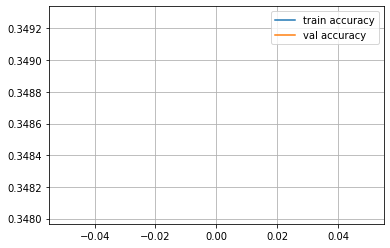

Epoch 1
Train accuracy: 0.35423925667828104
Val accuracy: 0.35123152709359606


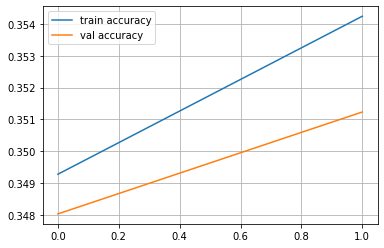

Epoch 2
Train accuracy: 0.3589906028930419
Val accuracy: 0.3566502463054187


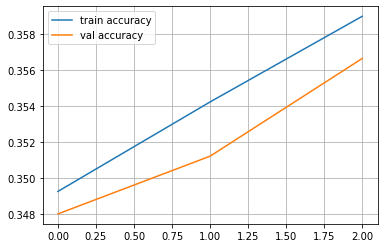

Epoch 3
Train accuracy: 0.3638475345792419
Val accuracy: 0.36354679802955664


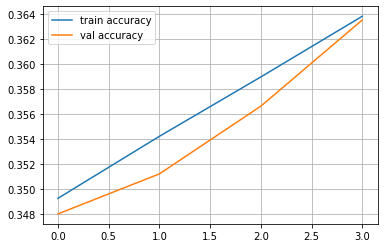

Epoch 4
Train accuracy: 0.3666983423080984
Val accuracy: 0.3694581280788177


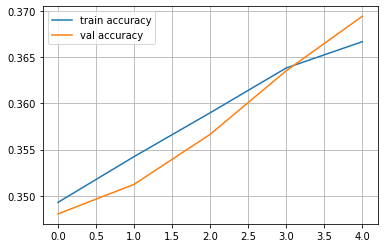

Epoch 5
Train accuracy: 0.3701826628655897
Val accuracy: 0.3766009852216749


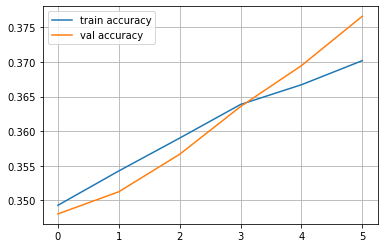

Epoch 6
Train accuracy: 0.3750395945517897
Val accuracy: 0.3800492610837438


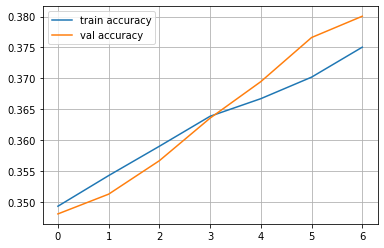

Epoch 7
Train accuracy: 0.3787350860521592
Val accuracy: 0.382512315270936


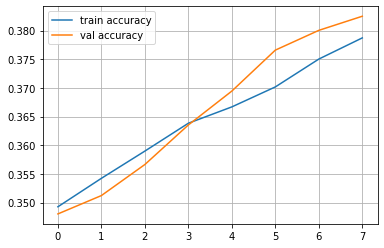

Epoch 8
Train accuracy: 0.38000211170942877
Val accuracy: 0.3832512315270936


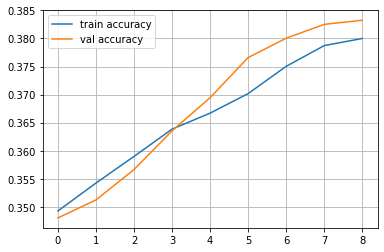

Epoch 9
Train accuracy: 0.3834864322669201
Val accuracy: 0.3891625615763547


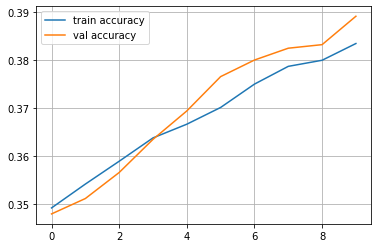

Epoch 10
Train accuracy: 0.385070214338507
Val accuracy: 0.39039408866995073


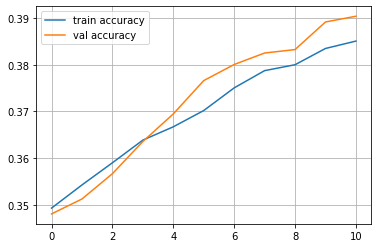

Epoch 11
Train accuracy: 0.3870763382958505
Val accuracy: 0.3926108374384236


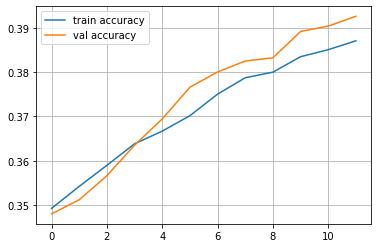

Epoch 12
Train accuracy: 0.38866012036743747
Val accuracy: 0.3926108374384236


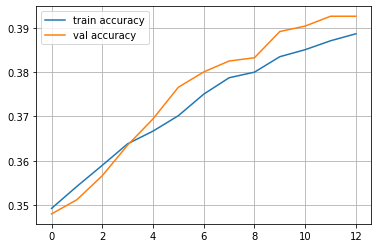

Epoch 13
Train accuracy: 0.38929363319607224
Val accuracy: 0.39482758620689656


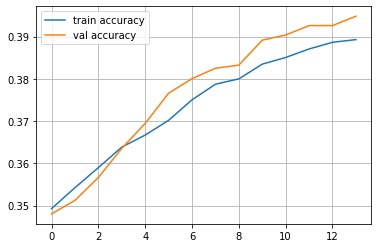

Epoch 14
Train accuracy: 0.38939921866751137
Val accuracy: 0.3933497536945813


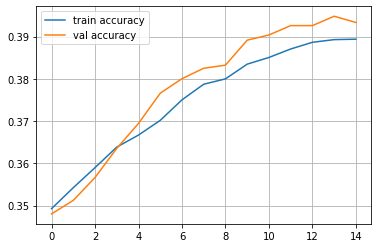

Epoch 15
Train accuracy: 0.39077182979622005
Val accuracy: 0.3958128078817734


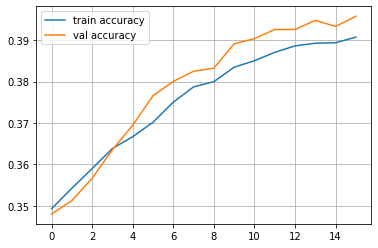

Epoch 16
Train accuracy: 0.39045507338190266
Val accuracy: 0.39507389162561574


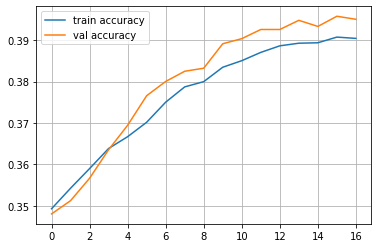

Epoch 17
Train accuracy: 0.3895048041389505
Val accuracy: 0.3938423645320197


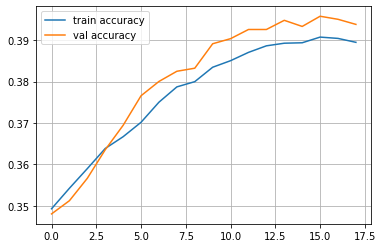

Epoch 18
Train accuracy: 0.38897687678175485
Val accuracy: 0.39458128078817734


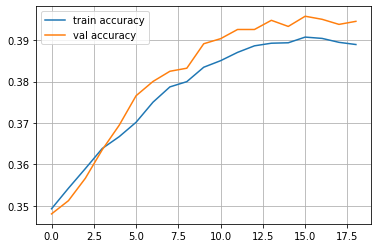

Epoch 19
Train accuracy: 0.38971597508182876
Val accuracy: 0.3967980295566502


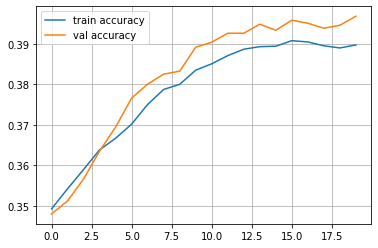

Epoch 20
Train accuracy: 0.38844894942455915
Val accuracy: 0.3997536945812808


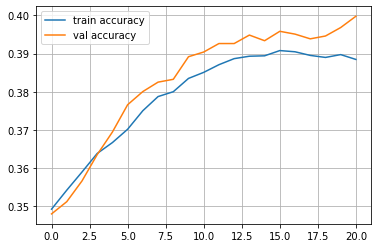

Epoch 21
Train accuracy: 0.38971597508182876
Val accuracy: 0.4022167487684729


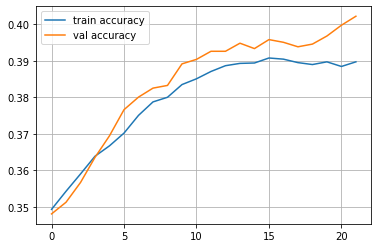

Epoch 22
Train accuracy: 0.3906662443247809
Val accuracy: 0.40295566502463054


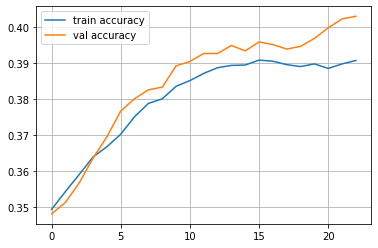

Epoch 23
Train accuracy: 0.3927779537535635
Val accuracy: 0.4041871921182266


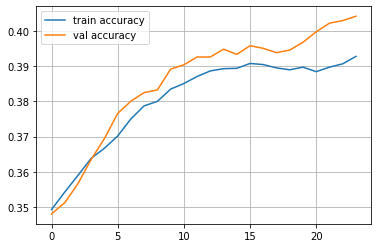

Epoch 24
Train accuracy: 0.39404497941083305
Val accuracy: 0.4056650246305419


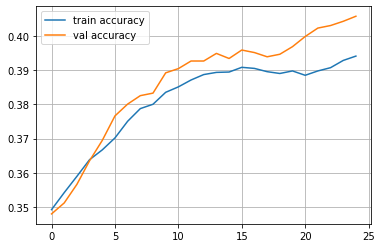

precision: 0.3524742846431912
recall: 0.4054657876132306
f1: 0.3614317948077681
accuracy: 0.4056650246305419
Confusion matrix: 
[[ 111  509  728]
 [ 107 1006  238]
 [ 318  513  530]]


In [66]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train_mlp, y_train_mlp)   
    train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
    val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred_mlp = network.predict(x_test_mlp)

eval = Evaluate(y_test_mlp, y_pred_mlp)
eval = eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [67]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train_mlp,y_train_mlp)

y_pred_mlp = mlp.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
eval = eval.get_evaluation_report()

precision: 0.7420791534201161
recall: 0.7285322096215555
f1: 0.7286977770690154
accuracy: 0.7288177339901478
Confusion matrix: 
[[ 849  179  320]
 [  57 1001  293]
 [ 170   82 1109]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


### Συγκρίσεις που αφορούν την ποιότητα

In [68]:
evaluations_mlp = {}

##### MLP with [10, 15, 20] Hidden Layer Neurons trained for 25 epochs

Epoch 24
Train accuracy: 0.5010030619786717
Val accuracy: 0.5044334975369458


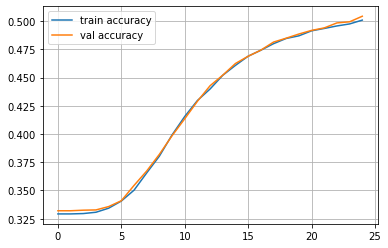

precision: 0.5904936070783656
recall: 0.5058135616164655
f1: 0.42944676262135556
accuracy: 0.5044334975369458
Confusion matrix: 
[[1171  162   15]
 [ 535  803   13]
 [ 910  377   74]]


In [69]:
network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train_mlp, y_train_mlp)   
    train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
    val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))

print("Epoch", epoch)
print("Train accuracy:", train_log[-1])
print("Val accuracy:", val_log[-1])  
plt.plot(train_log,label = 'train accuracy')
plt.plot(val_log,label = 'val accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.show()

y_pred_mlp = network.predict(x_test_mlp)

eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(10, 15, 20), our implementation, 25 epochs'] = eval.get_evaluation_report()

In [70]:
epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train_mlp,y_train_mlp)

y_pred_mlp = mlp.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(10, 15, 20), standard implementation, 25 epochs'] = eval.get_evaluation_report()

precision: 0.7404131667372579
recall: 0.7252704968341686
f1: 0.7243551655199002
accuracy: 0.725615763546798
Confusion matrix: 
[[ 813  201  334]
 [  55 1005  291]
 [ 153   80 1128]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Our implementation for 50 epochs:

Epoch 49
Train accuracy: 0.5949741315594974
Val accuracy: 0.5997536945812808


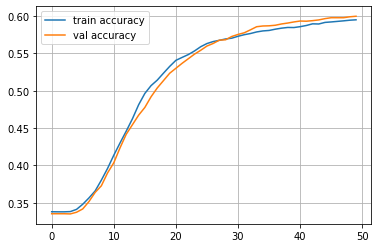

precision: 0.6325747043965676
recall: 0.5993152372982126
f1: 0.598969711564684
accuracy: 0.5997536945812808
Confusion matrix: 
[[ 676  259  413]
 [  61  741  549]
 [ 149  194 1018]]


In [71]:
network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(50):
    network.fit(x_train_mlp, y_train_mlp)   
    train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
    val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))
    #clear_output()
print("Epoch", epoch)
print("Train accuracy:", train_log[-1])
print("Val accuracy:", val_log[-1])  
plt.plot(train_log,label = 'train accuracy')
plt.plot(val_log,label = 'val accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.show()

y_pred = network.predict(x_test_mlp)

eval = Evaluate(y_test_mlp, y_pred)
evaluations_mlp['(10, 15, 20), our implementation, 50 epochs'] = eval.get_evaluation_report()

##### MLP with [100, 200, 100] Hidden Layer Neurons trained for 40 epochs

Epoch 39
Train accuracy: 0.6136627600042234
Val accuracy: 0.6229064039408867


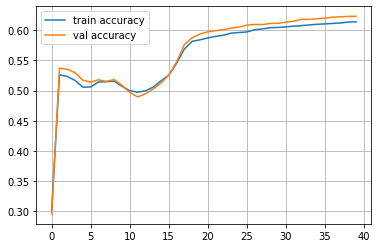

precision: 0.650482241973683
recall: 0.6232949711688992
f1: 0.6155113472648676
accuracy: 0.6229064039408867
Confusion matrix: 
[[ 759  351  238]
 [  29 1161  161]
 [ 169  583  609]]


In [72]:
network = MLP([100, 200, 100, 10], len(inputs))
train_log = []
val_log = []

for epoch in range(40):
     network.fit(x_train_mlp,y_train_mlp)
     train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
     val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))

print("Epoch", epoch)
print("Train accuracy:", train_log[-1])
print("Val accuracy:", val_log[-1])  
plt.plot(train_log,label = 'train accuracy')
plt.plot(val_log,label = 'val accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.show()
y_pred_mlp = network.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(100, 200, 100), our implementation, 40 epochs'] = eval.get_evaluation_report()

In [73]:
epochs = 40
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train_mlp,y_train_mlp)

y_pred_mlp = mlp.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(100, 200, 100), standard implementation, 40 epochs'] = eval.get_evaluation_report()

precision: 0.7588490283660505
recall: 0.7530492921738731
f1: 0.7536218894214427
accuracy: 0.7532019704433498
Confusion matrix: 
[[ 935  143  270]
 [  89 1038  224]
 [ 184   92 1085]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##### MLP with [300, 500, 300] Hidden Layer Neurons trained for 30 epochs

Epoch 29
Train accuracy: 0.6267553584626755
Val accuracy: 0.6399014778325123


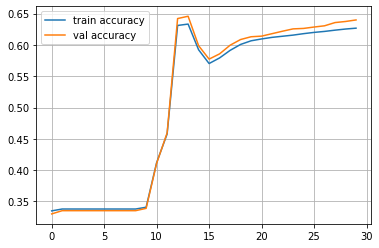

precision: 0.6800526291115244
recall: 0.6402713303939661
f1: 0.6321127090314564
accuracy: 0.6399014778325123
Confusion matrix: 
[[ 754  423  171]
 [  25 1210  116]
 [ 162  565  634]]


In [74]:
network = MLP([300, 500, 300, 20], len(inputs))
train_log = []
val_log = []

for epoch in range(30):
     network.fit(x_train_mlp,y_train_mlp)
     train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
     val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))

print("Epoch", epoch)
print("Train accuracy:", train_log[-1])
print("Val accuracy:", val_log[-1])  
plt.plot(train_log,label = 'train accuracy')
plt.plot(val_log,label = 'val accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.show()
y_pred_mlp = network.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(300, 500, 300), our implementation, 30 epochs'] = eval.get_evaluation_report()

In [75]:
epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(300, 500, 300), max_iter = epochs)

mlp.fit(x_train_mlp,y_train_mlp)

y_pred_mlp = mlp.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(300, 500, 300), standard implementation, 30 epochs'] = eval.get_evaluation_report()

precision: 0.7491666622078994
recall: 0.7391076826704053
f1: 0.7406182292824562
accuracy: 0.7391625615763546
Confusion matrix: 
[[1012   93  243]
 [ 160  948  243]
 [ 253   67 1041]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##### MLP with [300, 500, 300, 500] Hidden Layer Neurons trained for 30 epochs

Epoch 29
Train accuracy: 0.6575863161229015
Val accuracy: 0.6660098522167488


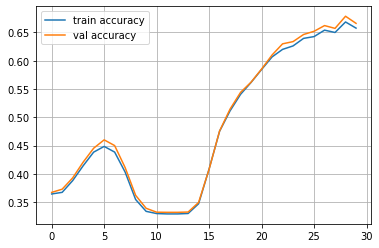

precision: 0.6728448103069974
recall: 0.6665229653063073
f1: 0.6586552958237084
accuracy: 0.6660098522167488
Confusion matrix: 
[[ 979  229  140]
 [ 155 1077  119]
 [ 369  344  648]]


In [76]:
network = MLP([300, 500, 300, 500, 20], len(inputs))
train_log = []
val_log = []

for epoch in range(30):
     network.fit(x_train_mlp,y_train_mlp)
     train_log.append(np.mean(network.predict(x_train_mlp) == y_train_mlp))
     val_log.append(np.mean(network.predict(x_test_mlp) == y_test_mlp))

print("Epoch", epoch)
print("Train accuracy:", train_log[-1])
print("Val accuracy:", val_log[-1])  
plt.plot(train_log,label = 'train accuracy')
plt.plot(val_log,label = 'val accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.show()
y_pred_mlp = network.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(300, 500, 300, 500), our implementation, 30 epochs'] = eval.get_evaluation_report()

In [77]:
epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(300, 500, 300, 500), max_iter = epochs)

mlp.fit(x_train_mlp,y_train_mlp)

y_pred_mlp = mlp.predict(x_test_mlp)
eval = Evaluate(y_test_mlp, y_pred_mlp)
evaluations_mlp['(300, 500, 300, 500), standard implementation, 30 epochs'] = eval.get_evaluation_report()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


precision: 0.7471306093825741
recall: 0.7422881362410756
f1: 0.7405382254064344
accuracy: 0.7423645320197044
Confusion matrix: 
[[ 867  242  239]
 [  47 1135  169]
 [ 172  177 1012]]


### Συγκρίσεις που αφορούν τους χρόνους

In [78]:
times_mlp = {}

##### MLP with [10, 15, 20] Hidden Layer Neurons trained for 25 epochs

In [79]:
start_time = time.time()
network = MLP([10, 15, 20, 3], len(inputs))
train_log = []
val_log = []
for epoch in range(25):
    network.fit(x_train_mlp, y_train_mlp)   
y_pred_mlp = network.predict(x_test_mlp)
times_mlp['(10, 15, 20), our implementation, 25 epochs'] = np.round(time.time() - start_time,4)

In [80]:
start_time = time.time()
epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)
mlp.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = mlp.predict(x_test_mlp)
times_mlp['(10, 15, 20), standard implementation, 25 epochs'] = np.round(time.time() - start_time,4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [81]:
start_time = time.time()
network = MLP([10, 15, 20, 3], len(inputs))
for epoch in range(50):
    network.fit(x_train_mlp, y_train_mlp)   
y_pred = network.predict(x_test_mlp)

times_mlp['(10, 15, 20), our implementation, 50 epochs'] = np.round(time.time() - start_time,4)

##### MLP with [100, 200, 100] Hidden Layer Neurons trained for 40 epochs

In [82]:
start_time = time.time()
network = MLP([100, 200, 100, 10], len(inputs))
for epoch in range(40):
     network.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = network.predict(x_test_mlp)
times_mlp['(100, 200, 100), our implementation, 40 epochs'] = np.round(time.time() - start_time,4)

In [83]:
start_time = time.time()
epochs = 40
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)
mlp.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = mlp.predict(x_test_mlp)
times_mlp['(100, 200, 100), standard implementation, 40 epochs'] = np.round(time.time() - start_time,4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##### MLP with [300, 500, 300] Hidden Layer Neurons trained for 30 epochs

In [84]:
start_time = time.time()
network = MLP([300, 500, 300, 20], len(inputs))
for epoch in range(30):
     network.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = network.predict(x_test_mlp)
times_mlp['(300, 500, 300), our implementation, 30 epochs'] = np.round(time.time() - start_time,4)

In [85]:
start_time = time.time()
epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(300, 500, 300), max_iter = epochs)
mlp.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = mlp.predict(x_test_mlp)
times_mlp['(300, 500, 300), standard implementation, 30 epochs'] = np.round(time.time() - start_time,4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##### MLP with [300, 500, 300, 500] Hidden Layer Neurons trained for 30 epochs

In [86]:
start_time = time.time()
network = MLP([300, 500, 300, 500, 20], len(inputs))
for epoch in range(30):
     network.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = network.predict(x_test_mlp)
times_mlp['(300, 500, 300, 500), our implementation, 30 epochs'] = np.round(time.time() - start_time,4)

In [87]:
start_time = time.time()
epochs = 30
mlp = MLPClassifier(hidden_layer_sizes=(300, 500, 300, 500), max_iter = epochs)
mlp.fit(x_train_mlp,y_train_mlp)
y_pred_mlp = mlp.predict(x_test_mlp)
times_mlp['(300, 500, 300, 500), standard implementation, 30 epochs'] = np.round(time.time() - start_time,4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [88]:
print_dict_as_html_table(dict(evaluations_mlp.items()),dict(times_mlp.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
"(10, 15, 20), our implementation, 25 epochs",50.44334975369458,0.4922
"(10, 15, 20), standard implementation, 25 epochs",72.5615763546798,1.077
"(10, 15, 20), our implementation, 50 epochs",59.97536945812808,1.0678
"(100, 200, 100), our implementation, 40 epochs",62.29064039408867,7.5466
"(100, 200, 100), standard implementation, 40 epochs",75.32019704433498,12.4434
"(300, 500, 300), our implementation, 30 epochs",63.99014778325123,24.6377
"(300, 500, 300), standard implementation, 30 epochs",73.91625615763546,44.1343
"(300, 500, 300, 500), our implementation, 30 epochs",66.60098522167488,35.6899
"(300, 500, 300, 500), standard implementation, 30 epochs",74.23645320197045,64.5365


Με βάση τον παραπάνω πίνακα παίρνουμε τα κάτωθι αποτελέσματα:

* Όσον αφορά τον αριθμό των νευρώνων:

Παρατηρούμε ότι αύξηση του αριθμού των νευρώνων συνεπάγεται αύξηση της accuracy για την δική μας υλοποίηση ενώ για την έτοιμη βλέπουμε ότι μπορεί και να μειωθεί ελάχιστα.

* Όσον αφορά τον αριθμό των εποχων:

Παρατηρούμε ότι η δική μας υλοποίηση παράγει γενικά χειρότερα αποτελέσματα από την έτοιμη υλοποίηση, κάτι το οποίο ήταν αναμενόμενο μιας και στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις. Προκειμένου να προσεγγίσουμε την τιμή της έτοιμης υλοποίησης, θα πρέπει να αυξήσουμε τον αριθμό των εποχών αφού όπως βλέπουμε, για διπλασιασμό του αριθμού των εποχών έχουμε αύξηση της accuracy κατά περίπου 10 μονάδες.

* Όσον αφορά τον αριθμό των επιπέδων:

Είδαμε ότι αυξάνοντας τον αριθμό των επιπέδων, αυξήθηκε αντίστοιχα η ακρίβεια (όπως αναμέναμε) αυξάνοντας ωστόσο και το υπολογιστικό κόστος μιας και έπρεπε να γίνουν πρόσθετοι υπολογισμοί για το νέο επίπεδο.

* Όσον αφορά τους χρόνους εκτέλεσης:

Παρατηρούμε ότι η έτοιμη υλοποίηση εκτελείται για μεγαλύτερη χρονική διάρκεια από ότι η δική μας υλοποίηση. Κάτι τέτοιο ήταν αναμενόμενο μιας και εφόσον παράγει καλύτερα αποτελέσματα από την δική μας, κάνει πιο εξαντλητικούς ελέχγους προκειμένου να καταλήξει σε μία όσο το δυνατόν σωστότερη ταξινόμηση.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 


---





Παραθέτουμε για μία ακόμα φορά τους συνοπτικούς πίνακες που παραάχθηκαν για κάθε αλγόριθμο:

* ΚΝΝ

In [89]:
print_dict_as_html_table(dict(evaluations.items()),dict(times.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
"k = 5, KNC",69.0,0.0273
"k = 5, euclidean",69.0,7.9531
"k = 5, cosine",68.0,14.1229
"k = 10, KNC",69.0,0.0302
"k = 10, euclidean",69.0,8.0482
"k = 10, cosine",72.0,14.3336
"k = 10, KNC, 50 samples",70.0,0.0241
"k = 10, euclidean, 50 samples",70.0,7.8137
"k = 10, cosine, 50 samples",78.0,14.0155
"k = 50, KNC",74.0,0.0355


* Naive Bayes

In [90]:
print_dict_as_html_table(dict(evaluations_nb.items()),dict(times_nb.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
Naive Bayes,62.0,0.2645
Gaussian Naive Bayes,70.0,0.02


* MLP

In [91]:
print_dict_as_html_table(dict(evaluations_mlp.items()),dict(times_mlp.items()))

Ταξινομητές,Ορθότητα (%),Χρόνοι εκτέλεσης
"(10, 15, 20), our implementation, 25 epochs",50.44334975369458,0.4922
"(10, 15, 20), standard implementation, 25 epochs",72.5615763546798,1.077
"(10, 15, 20), our implementation, 50 epochs",59.97536945812808,1.0678
"(100, 200, 100), our implementation, 40 epochs",62.29064039408867,7.5466
"(100, 200, 100), standard implementation, 40 epochs",75.32019704433498,12.4434
"(300, 500, 300), our implementation, 30 epochs",63.99014778325123,24.6377
"(300, 500, 300), standard implementation, 30 epochs",73.91625615763546,44.1343
"(300, 500, 300, 500), our implementation, 30 epochs",66.60098522167488,35.6899
"(300, 500, 300, 500), standard implementation, 30 epochs",74.23645320197045,64.5365


* Όσον αφορά την ποιότητα των αποτελεσμάτων:

Παρατηρούμε ότι από τις δικές μας υλοποιήσεις τα καλύτερα αποτελέσματα τα παρήγαγε ο ΚΝΝ αλγόριθμος με accuracy 74%. Ακολουθούν ο MLP με accuracy 60-65% ανάλογα τις παραμέτρους και ο χειρότερος ήταν ο Naive Bayes με accuracy 62%. Βλέπουμε ότι και οι τρεις έτοιμες υλοποιήσεις κατάφεραν ακρίβεια γύρω στο 70%, αριθμός ο οποίος θεωρείται ικανοποιητικός. Την καλύτερη απόδοση από τους έτοιμους αλγορίθμους την κατάφερε ο MLP με ακρίβεια 75% με 40 εποχές και σχετικά λίγους νευρώνες στα κρυφά επίπεδα.

* Όσον αφορά τους χρόνους εκτέλεσης:

Αναφορικά με τις δικές μας υλοποιήσεις, τους μικρότερους χρόνους κατάφερε ο Naive Bayes, έχοντας ωστόσο το trade-off χρόνου-απόδοσης, ενώ τους μεγαλύτερους ο ΚΝΝ. Από τις έτοιμες υλοποιήσεις βλέπουμε ότι ο MLP αργεί αρκετά, φτάνοντας μέχρι και στα 64sec, χρόνος ο οποίος θεωρείται πολύς για την εκπαίδευση και την πρόβλεψη ενός τόσο μικρού dataset.

* Όοσν αφορά την δυσκολία υλοποίησης:

Σίγουρα ο MLP ήταν ο πιο δύσκολος στην υλοποίηση μιας και απαιτείται η υλοποίηση πολλών και διαφορετικών συνιστωσών της κλάσης ενώ ο πιο εύκολος ήταν ο KNN.

Συμπερασματικά, σε ένα τέτοιο πρόβλημα θα επιλέγαμε την δική μας υλοποίηση του KNN ή του MLP, ενώ σε περίπτωση που μπορούσαμε να χρησιμοποιήσουμε οποιονδήποτε έτοιμο αλγόριθμο της `sklearn` ως black box τότε οποιονδήποτε και να διαλέγαμε δεν θα είχε τόσο μεγάλη διαφορά.